In [32]:
import pandas as pd #data processing
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

df=pd.read_csv('fake-news/fake-news.csv')
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [3]:
df = df.fillna(' ')

In [4]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<AxesSubplot:xlabel='label', ylabel='count'>

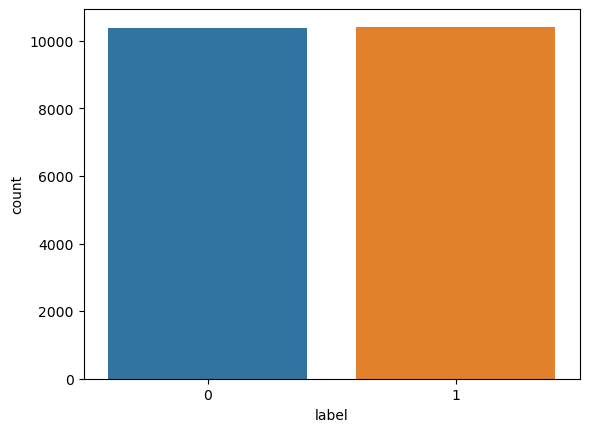

In [6]:
sns.countplot(x='label',data=df)

In [7]:
df['total'] = df['title'] + ' ' + df['author'] + ' ' + df['text']

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
for index, row in df.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()
    df.loc[index, 'total'] = filter_sentence

df = df[['total', 'label']]

In [10]:
df.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [11]:
X_train = df['total']
Y_train = df['label']

In [12]:
#Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [14]:
print(X_test)
print(Y_test)

  (0, 183612)	0.07899964191274957
  (0, 183538)	0.05913417163539868
  (0, 183075)	0.025234486700569814
  (0, 181805)	0.024532404198010605
  (0, 181620)	0.03255766062720545
  (0, 180984)	0.045682363006551346
  (0, 179761)	0.03997438546284669
  (0, 178834)	0.06686426090539281
  (0, 174241)	0.1065167901434828
  (0, 168620)	0.06208290690025709
  (0, 167579)	0.06789529719729305
  (0, 166078)	0.09218418174148231
  (0, 166055)	0.060713367278905125
  (0, 165994)	0.025659050924499965
  (0, 165665)	0.04889565062449755
  (0, 165372)	0.04505954806517732
  (0, 165041)	0.03412204857562417
  (0, 164527)	0.035404829539302386
  (0, 162219)	0.045857247930900895
  (0, 162105)	0.03196248668827905
  (0, 159311)	0.07791900701693827
  (0, 158394)	0.07374224437820319
  (0, 158041)	0.14180073398931745
  (0, 156841)	0.06886332901956349
  (0, 154809)	0.10330637952602734
  :	:
  (5199, 35017)	0.08481018350962373
  (5199, 32578)	0.06028788898769838
  (5199, 31569)	0.06436787701890691
  (5199, 29239)	0.070012575685

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Accuracy1 = logreg.score(X_test, Y_test)
print("Logistic Regression Accuracy",Accuracy1*100)

Logistic Regression 96.15384615384616


In [16]:
logRegPrediction = logreg.predict(X_test)
print(logRegPrediction)

[0 1 1 ... 0 1 1]


In [34]:
print("Logistic Regression Accuracy",Accuracy1)
print("Logistic Regression f1_score",f1_score(Y_test, logRegPrediction, average="macro"))
print("Logistic Regression precision_score",precision_score(Y_test, logRegPrediction, average="macro"))
print("Logistic Regression recall_score",recall_score(Y_test, logRegPrediction, average="macro"))

Logistic Regression Accuracy 0.9615384615384616
Logistic Regression f1_score 0.9615230707667684
Logistic Regression precision_score 0.9616731918400989
Logistic Regression recall_score 0.961445862993852


[[2448  116]
 [  84 2552]]


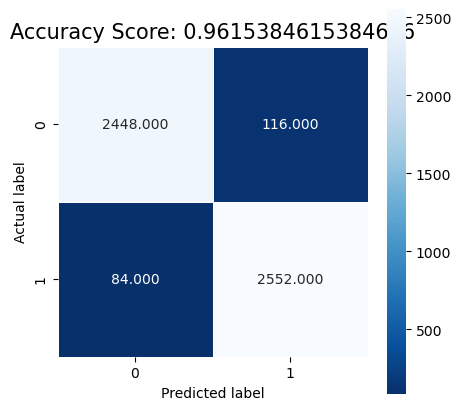

In [18]:
#Confusion Metrics
logRegcm = metrics.confusion_matrix(Y_test, logRegPrediction)
print(logRegcm)

plt.figure(figsize=(5,5))
sns.heatmap(logRegcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Accuracy1)
plt.title(all_sample_title, size = 15);

In [19]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, Y_train)
Accuracy2 = NB.score(X_test, Y_test)
print("Naive Bayes",Accuracy2*100)

Naive Bayes 84.42307692307692


In [20]:
NBPrediction = NB.predict(X_test)
print(NBPrediction)

[0 0 1 ... 0 1 0]


In [42]:
print("Naive Bayes Accuracy",Accuracy2)
print("Naive Bayes f1_score",f1_score(Y_test, NBPrediction, average="macro"))
print("Naive Bayes precision_score",precision_score(Y_test, NBPrediction, average="macro"))
print("Naive Bayes recall_score",recall_score(Y_test, NBPrediction, average="macro"))


Naive Bayes Accuracy 0.8442307692307692
Naive Bayes f1_score 0.841151457333553
Naive Bayes precision_score 0.8786037784679088
Naive Bayes recall_score 0.8463208331064653


[[2557    7]
 [ 803 1833]]


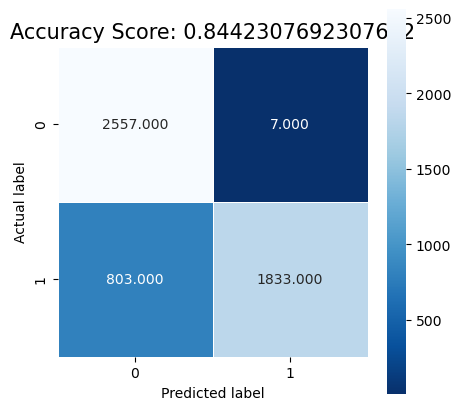

In [21]:
#Confusion Metrics
NBcm = metrics.confusion_matrix(Y_test, NBPrediction)
print(NBcm)

plt.figure(figsize=(5,5))
sns.heatmap(NBcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Accuracy2)
plt.title(all_sample_title, size = 15);

In [22]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train, Y_train)
Accuracy3 = DTclf.score(X_test, Y_test)
print("Decision Tree Classifier",Accuracy3*100)

Decision Tree Classifier 97.01923076923077


In [28]:
DTclPrediction = DTclf.predict(X_test)
print(DTclPrediction)

[0 1 1 ... 0 1 0]


In [39]:
print("Decision Tree Classifier Accuracy",Accuracy3)
print("Decision Tree Classifier f1_score",f1_score(Y_test, DTclPrediction, average="macro"))
print("Decision Tree Classifier precision_score",precision_score(Y_test, DTclPrediction, average="macro"))
print("Decision Tree Classifier recall_score",recall_score(Y_test, DTclPrediction, average="macro"))

Decision Tree Classifier Accuracy 0.9701923076923077
Decision Tree Classifier f1_score 0.9701819320191705
Decision Tree Classifier precision_score 0.9702887491768768
Decision Tree Classifier recall_score 0.9701200111737398


[[2474   90]
 [  65 2571]]


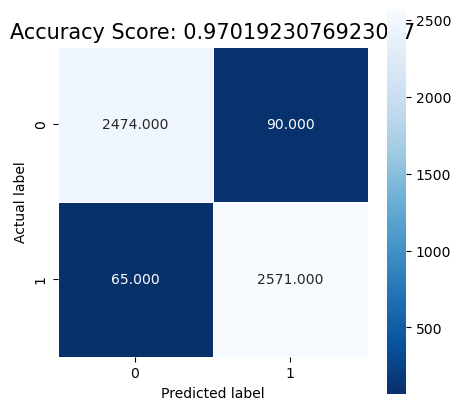

In [29]:
#Confusion Metrics
NBcm = metrics.confusion_matrix(Y_test, DTclPrediction)
print(NBcm)

plt.figure(figsize=(5,5))
sns.heatmap(NBcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Accuracy3)
plt.title(all_sample_title, size = 15);

In [43]:
X_new = X_test[1]

prediction = DTclf.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('The news in Real')
else:
  print('The news is Fake and Unreliable')

[1]
The news is Fake and Unreliable


In [ ]:
df[1:2]

,id,title,author,text,label
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
